# Lecture 4
Learning goals
 + pathlib
 + buffers and topology
 + chloropleth maps


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import geopandas as gpd

## Pathlib and managing paths (esp. across operating systems!)
You've probably noticed that Windows uses \ to separate directories, while Mac and Linux file systems
use /.  Also, some directories seem to begin with `\\`.  What a mess!  Enter _pathlib_.

In [3]:
Path.cwd()

PosixPath('/Users/timb/syncs/OneDrive - University of Idaho/TEACHINGs/GEOG479_GIS_programming/GIS_programming_F21/weeks/wk04_vectorsII')

In [6]:
datasets_dir = Path('../../datasets')
# ls ../../

In [10]:
type(datasets_dir)

pathlib.PosixPath

In [11]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

../../datasets/moscow/moscow_vectors/Moscow.gdb
<class 'pathlib.PosixPath'>


In [12]:
moscow_gdb_path.exists()

True

In [14]:
moscow_gdb_path.is_dir()

True

Amazing, clear, cheatsheet for much of what pathlib can do:
https://github.com/chris1610/pbpython/blob/master/extras/Pathlib-Cheatsheet.pdf

In [15]:
my_dir_name = 'TCB_work'
my_path = Path(my_dir_name)

In [19]:
my_path.absolute()

PosixPath('/Users/timb/syncs/OneDrive - University of Idaho/TEACHINGs/GEOG479_GIS_programming/GIS_programming_F21/weeks/wk04_vectorsII/TCB_work')

In [20]:
my_path.exists()

False

## Now
Use an if statement to check if a folder exists.  If it does not, create it in the present directory.  If it does exist, then print a warning.

Use path.exists() and path.mkdir().  path.rmdir() to remove a directory

In [21]:
my_path

PosixPath('TCB_work')

In [22]:
my_path.mkdir()

In [26]:
my_path = Path('last_20_min')

if my_path.exists():
    print('That path already exists')
else:
    my_path.mkdir()

In [28]:
Path('TCB_work').rmdir()

#### Globbing

In [29]:
moscow_gdb_path

PosixPath('../../datasets/moscow/moscow_vectors/Moscow.gdb')

In [37]:
file_list = list(moscow_gdb_path.glob('*.spx'))
str(file_list[2])

'../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000004.spx'

In [34]:
for file in moscow_gdb_path.glob('*gdbt*'):
    print(file)
    

../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000005.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000004.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a0000000a.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a0000000a.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000005.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000004.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000002.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000003.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000009.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000009.gdbtablx
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000002.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000003.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a0000000c.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a0000000b.gdbtable
../../datasets/moscow/moscow_vectors/Moscow.gdb/a00000006.gdbt

In [38]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [39]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [40]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

In [41]:
parcels.centroid

0       POINT (2312316.563 1841855.854)
1       POINT (2310889.377 1842183.675)
2       POINT (2314032.262 1843722.904)
3       POINT (2310999.398 1850776.387)
4       POINT (2310997.470 1850854.715)
                     ...               
7389    POINT (2309827.633 1844939.828)
7390    POINT (2309631.082 1844892.130)
7391    POINT (2309678.033 1844935.229)
7392    POINT (2309702.081 1844949.559)
7393    POINT (2315761.545 1843658.201)
Length: 7394, dtype: geometry

## Property sales over time

In [ ]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')




In [ ]:
parcels['SaleDate']

In [ ]:
dates = parcels['PM_DEEDCDT'].to_numpy()
yr = np.full( dates.shape, np.nan )

for i in range(len(dates)):
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
#         print(date)
    else:
        yr[i] = np.nan
#     print(date)
# np.datetime_as_string(parcels['SaleDate'])

parcels['SaleYear'] = yr
# parcels['SaleYear'] = parcels['SaleDate'].to_numpy().astype('M8[Y]')

In [ ]:
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1970-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            np.timedelta64(365, 'D')/365 ) )
ax.set_ylabel('Number of property sales in Moscow')
# ax.set_xlim(np.datetime64('2010-01-01'), np.datetime64('2012-01-01') )
ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )



In [ ]:
# np.arange(np.datetime64('2015-01-01'), 
#                                             np.datetime64('2022-01-01'), 
#                                             np.timedelta64(365.25, 'D')/12 )
np.timedelta64(365, 'D')/12

In [ ]:
# parcels['SaleDate'].to_numpy().astype('M8[Y]')

In [ ]:
# [np.datetime64(i,'Y') for i in parcels['SaleYear'][:2]]


In [ ]:
parcels['SaleYear'][:2].astype('float64')

<AxesSubplot:>

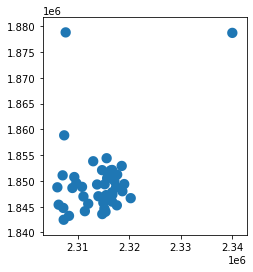

In [49]:
parks.buffer(1000).plot()

In [ ]:
buffer_radius = 1000

i=4

buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
# .buffer(buffer_radius) # Buffer in native dimensions, feet
overlapping_parcels = parcels.overlaps(buffered_park.geometry.to_numpy()[0]) 
    # buffered_park.plot()



<div class="alert alert-block alert-warning">

## Generate a list of all parcels that are not within 1000 ft of a park
You're a city planner.  You want to reach out to citizens of Moscow who are underserved with access to parks.
But first you need to know who those citizens are..
</div>

<div class="alert alert-block alert-warning">

### How long ago did 50% of the properties change hands?
As in, fill in the blank: "Half of properties in the Moscow area have been sold within _____ years."
</div>

In [ ]:
roads

In [ ]:
zoning.columns

In [ ]:
from shapely.geometry import Polygon, LineString, Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.85e6))

In [ ]:
city_limits.bounds


In [ ]:
parcels

In [ ]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )
# parcels.plot(column='Val_per_foot', ax=ax, legend=True, vmax=200);
# parcels.plot(column='PM_TOT_VAL', ax=ax, legend=True, vmax=400000);
# parcels.plot(column='PM_IMP_VAL', ax=ax, legend=True, vmin=150000, vmax=600000);

# parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280);
zoning.plot(column='LANDUSECODE', ax=ax)

# parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')

In [ ]:
city_limits.bounds
# ax.set_xlim( city_limits.bounds.to_numpy()[0][:] )
city_limits.bounds.to_numpy()[0][:]


### Roads close to schools and parks?